In [1]:
#getting libraries
using Distributions
using Distances
using Random
using Plots
using Statistics
using Flux
using TSPLIB

## BENCHMARK FUNCTIONS

UNIMODAL

In [2]:
# De Jong (sphere) function

sphere(x)=sum(x.^2)


#Chung Reynolds

function Chung_Reynolds(x)
    sum = 0
    n = length(x)
    for i in 1:n
        sum += x[i]^2
    end
    val = sum^2
    return val
end

# Schwefel 2.22 function

function schwefel_2_22(x)
    sum = 0
    prod = 1
    n = length(x)
    for i in 1:n
        sum += abs(x[i])
        prod *= abs(x[i])
    end
    val = sum+ prod
    return val
end

# Schwefel 2.20 function

function schwefel_2_20(x)
    sum = 0
    n = length(x)
    for i in 1:n
        sum += abs(x[i])
    end
    val = sum
    return val
end

# Schwefel 2.23 function

function schwefel_2_23(x)
    sum = 0
    n = length(x)
    for i in 1:n
        sum += x[i]^10
    end
    val = sum
    return val
end

# Sum Squares function

function Sum_Squares(x)
    sum = 0
    n = length(x)
    for i in 1:n
        ele = x[i]^2
        sum += (i*ele)
    end
    val = sum
    return val
end

# Powell Sum function

function Powell_Sum(x)
    sum = 0
    n = length(x)
    for i in 1:n
        ele = abs(x[i])
        sum += ele^(i+1)
    end
    val = sum
    return val
end

# Powell Singular-2 function

function Powell_Singular_2(x)
    sum = 0
    n = length(x)
    for i in 2:n-3
        p1 = (x[i-1] - 10x[i])^2
        p2 = 5*((x[i+1] + x[i+2])^2)
        p3 = (x[i] - x[i+1])^4
        p4 = 10*((x[i-1] + x[i+2])^4)
        sum += p1 + p2 + p3 +p4
    end
    val = sum
    return val
end

Powell_Singular_2 (generic function with 1 method)

MULTIMODAL

In [3]:
# ackley function

function ackley(x)
    # x = [x1, x2, ..., xd]
    # a = default value 20
    # b = default value 0.2
    # c = default value 2*pi
    a = 20
    b = 0.2
    c = 2*π
    n = length(x)
    sum1 = 0
    sum2 = 0
    for i in 1:n
        sum1 += x[i]^2
        sum2 += cos(c*x[i])
    end
    
    term1 = -a * exp(-b*sqrt(sum1/n))
    term2 = -exp(sum2/n)
    y = term1 + term2 + a + exp(1)
    return y
end

# rastrigin function

function rastrigin(x)
    val = -10length(x)
    n = length(x)
    for i in 1:n
        val += -x[i]^2+10cos(π*x[i])
    end
    val =-val
    return val
end

# Brown function

function brown(x)
    val = 0
    n = length(x)
    for i in 1:n-1
        p1 = x[i]^2
        p2 = x[i+1]^2
        val += p1^(x[i+1]^2 + 1) + p2^(x[i]^2+1) 
    end
    return val
end

# cigar function

function cigar(x)
    val = 0
    n = length(x)
    for i in 2:n
        val += x[i]^2
    end
    val *= 10^6
    val += x[1]^2
    return val
end


# Csendes function

function csendes(x)    
    n = length(x)
    result = 0.0
    for i in 1:n
        if x[i] != 0
            result += x[i]^6 * (2 + sin(1 / x[i]))
        else
            result += x[i]^6 * 2
        end
    end
    return result

    
end

# Griewank function

function griewank(x)
    sum = 0
    prod = 1
    n = length(x)
    for i in 1:n
        sum += (x[i]^2) / 4000
        prod *= cos(x[i]/(i^1/2))
    end
    val = 1+ sum - prod
    return val
end

# Schwefel 2.25 function

function schwefel_2_25(x)
    sum = 0
    n = length(x)
    for i in 2:n
        p1 = (x[i]-1)^2
        p2 = (x[1] - x[i]^2)^2
        sum += p1 + p2
    end
    val = sum
    return val
end

# Zakharov function

function zakharov(x)
    sum1 = 0
    sum2 = 0
    n = length(x)
    for i in 2:n
        sum1 += x[i]^2
        sum2 += 0.5 * i * x[i]
    end
    val = sum1 + sum2^2 + sum2^4
    return val
end

zakharov (generic function with 1 method)

FIXED DIMENSION

In [4]:
# zirilli function

function zirilli2(x)
    x1 = x[1]
    x2 = x[2]
    val = (0.5 * (x1 ^ 2)) + (0.5 * (1 - cos(2*x1)) ) + (x2 ^ 2)
    return val
end

# matyas function

function matyas2(x)
    x1 = x[1]
    x2 = x[2]
    val = (0.26 * ((x1 ^ 2) + (x2 ^ 2) ))  - (0.48 * x1 * x2)
    return val
end


# Trecanni function

function trecanni2(x)
    x1 = x[1]
    x2 = x[2]
    term1 = x1^4
    term2 = 4 * x1^3
    term3 = 4 * x1^2
    term4 = x2^2
    return term1 + term2 + term3 + term4
end

# Price function

function price2(x)
    x1 = x[1]
    x2 = x[2]
    val = ((2*(x1^3)*x2) - x2^3)^2 + (6*x1 - x2^2 + x2)^2
    return val
end

# Chen Bird function

function chen_bird2(x)
    x1 = x[1]
    x2 = x[2]
    b = 0.001
    #val = (0.001 / (floor(0.001^2 + (x1 -0.4x2 -0.1)^2))) - (0.001 / (floor(0.001^2 + (2x1 +x2 -1.5)^2)))
    term1 = b / (b^2 + (x1^2 + x2^2 - 1)^2)
    term2 = b / (b^2 + (x1^2 + x2^2 - 1/2)^2)
    term3 = b / (b^2 + (x1 - x2)^2)
    return term1 + term2 + term3
end

# Colville function

function colville4(x)
    x₁, x₂, x₃, x₄ = x
    term1 = 100 * (x₁^2 - x₂)^2
    term2 = (x₁ - 1)^2
    term3 = (x₃ - 1)^2
    term4 = 90 * (x₃^2 - x₄)^2
    term5 = 10.1 * ((x₂ - 1)^2 + (x₄ - 1)^2)
    term6 = 19.8 * (x₂ - 1) * (x₄ - 1)
    return term1 + term2 + term3 + term4 + term5 + term6
end


colville4 (generic function with 1 method)

## HONEY BADGER ALGORITHM

RANDOM POPULATION GENERATOR

In [5]:
# create m random vectors of d dimensions in the range [a,b]
function rand_population_uniform(m, d, a, b)
    return [rand(Uniform(a,b),d) for i in 1:m]
end

rand_population_uniform (generic function with 1 method)

INTENSITY FUNCTION

In [6]:
# intensity function

function intensity(N, x, x_prey)
    d = zeros(N)
    S = zeros(N)
    I = zeros(N)
    for i in 1:N-1
        d[i] = euclidean(x[i], x_prey) ^ 2
        S[i] = euclidean(x[i],x[i+1]) ^ 2
    end
    d[N] = euclidean(x[N], x_prey)
    S[N] = euclidean(x[N],x[1])
    for i in 1:N
        r2 = rand(Uniform(0,1))
        I[i] = r2 * S[i] / (4 * π * d[i] )
    end
    return I
end

intensity (generic function with 1 method)

HONEY BADGER ALGORITHM

In [7]:
# Honey Badger Algorithm

function my_metaheuristic(t_max, N, beta, C, x, obj_func)
    # t_max = maximum no of iterations
    # N = population size
    # beta = default value as 6
    # C = default value as 2
    # x = initial population
    # obj_func = benchmark function
    # f = fitness of the population
    # x_prey = best position found so far
    # f_prey = best fitness value so far for the x_prey
    # x_new = new position calculated for the ith honey badger
    # f_new = new fitness calculated for the ith honey badger
    # I = intensity of the honey badger
    # F = disturbance direction
    
    #calucalte the fitness of each honey badger
    f = obj_func.(x)
    #println("fitness vecor: ", f)
    
    #save best posiiton and fitness
    f_prey, x_prey_index = findmin(f)
    x_prey = x[x_prey_index]
    #println("best solution: ", x_prey, " fitness: ", f_prey)
    #println("fitness: ", f_prey)
    fitness_values = []
    push!(fitness_values,(0,f_prey))
    for t in 1:t_max
        
        #println("iteration: ", t)
        
        #calculate the density factor / decreasing factor
        alpha = C * exp(-t / t_max)
        #println("alpha: ", alpha)
        
        #calcualte the intensity of the all honey badgers
        I = intensity(N, x, x_prey)
        #println("Intensity: ", I)
        
        for i in 1:N
            
            #calcuate distance between prey and ith honey badger
            d = x_prey - x[i]
            
            #generate disturbance
            r6 = rand(Uniform(0,1))
            if r6<=0.5
                F = 1
            else
                F = -1
            end
            
            #generate a random value to deicde between digging vs honey mode
            r2 = rand(Uniform(0,1))
            
            if isinf(I[i])
                r2 = 0.9
            end
            
            if r2<0.5
                # digging mode
                #println("Digging mode")
                r3 = rand(Uniform(0,1))
                r4 = rand(Uniform(0,1))
                r5 = rand(Uniform(0,1))
                #println("Intensity: ", I[i])
                #p = abs(cos(2*π*r4) * (1 - cos(2*π*r5)))
                #println("cos value: ", p)
                x_new = x_prey + (F * beta * I[i] * x_prey) + (F * r3 * alpha * d * abs(cos(2*π*r4) * (1 - cos(2*π*r5))))
                f_new = obj_func(x_new)
            
            else
                # honey node
                #println("Honey mode")
                r7 = rand(Uniform(0,1))
                x_new = x_prey + (F * r7 * alpha * d)
                f_new = obj_func(x_new)
            end
            
            # evaluate the new posiiton and fitness values
            
            #local position update
            if f_new < f[i]
                #println("local position is improved")
                #println("values", x[i], ";", x_new, ";", f[i], ";", f_new  )
                x[i] = x_new
                f[i] = f_new
                
                #println("local position is improved fin")
            end
            
            #prey position update
            if f_new<f_prey
                #println("prey position is improved with honey badger # ", i)
                x_prey = x_new
                f_prey = f_new
            end
            
        end
        push!(fitness_values,(t,f_prey))
        #println("fitness: ", f_prey)
    end
   return x_prey, f_prey, fitness_values 
end
    

my_metaheuristic (generic function with 1 method)

Code for running my_metaheuristic

****Statistical Analysis****
Mean Solution: 5.012605136698747e-29
Standard Deviation: 2.5171469803371054e-28
****Convergence Graph****
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[4.12426844963989e9, 1.2549393818515856e7, 194841.98690024443, 4668.373965542953, 37.81993213582926, 1.0715779365545515, 0.006308886996174141, 0.0012457318023297898, 5.382403032093379e-6, 2.621808941362215e-7, 8.312466271534923e-9, 2.488672170460237e-10, 3.2927751343773755e-12, 3.836388645281141e-14, 1.2048240796931871e-15, 2.6832418589969106e-18, 4.0652744532712674e-20, 5.266634782023033e-22, 2.87319720414935e-24, 1.5100515481492512e-26, 5.012605136698747e-29]


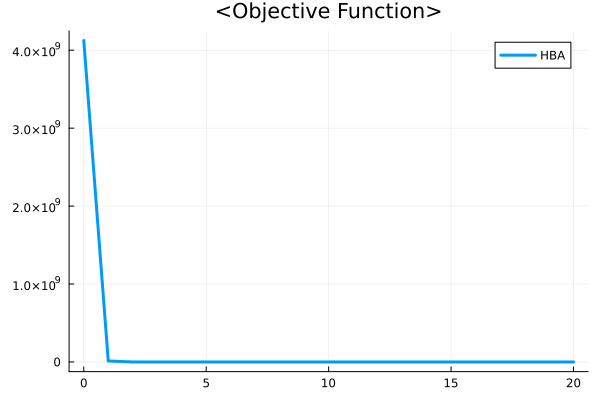

In [8]:
#dimensions
d = 30
#lower bound
a = -100
#upper bound
b = 100
# population size
N = 50
#iterations
t_max = 20
#constant beta
beta = 6
#constant C
C = 2
#objective function
obj_func(x) = Chung_Reynolds(x)



iter = []
simul = zeros(t_max+1)
best_value = []
for i in 1:30
    #generate honey badgers
    x = rand_population_uniform(N, d, a, b)
    x_prey, f_prey, fitness_values = my_metaheuristic(t_max, N, beta, C, x, obj_func)
    #println("best solution: ", x_prey, " fitness: ", f_prey)
    simul += last.(fitness_values)
    if i ==1
        iter = first.(fitness_values)
    end
    push!(best_value, f_prey)
end
simul = simul/30
println("****Statistical Analysis****")
println("Mean Solution: ", mean(best_value))
println("Standard Deviation: ", std(best_value))

println("****Convergence Graph****")
x_val = iter
y_val = simul
println(x_val)
println(y_val)
plot(x_val, y_val, title="<Objective Function>", label="HBA", linewidth=3)

## BENCHMARK RESULTS

Statistical Analysis

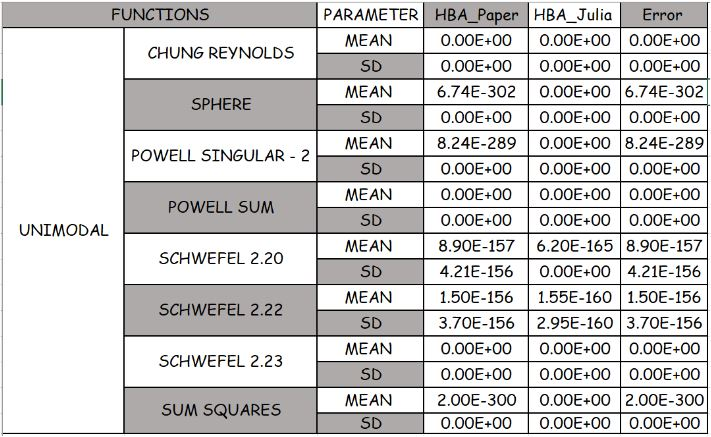

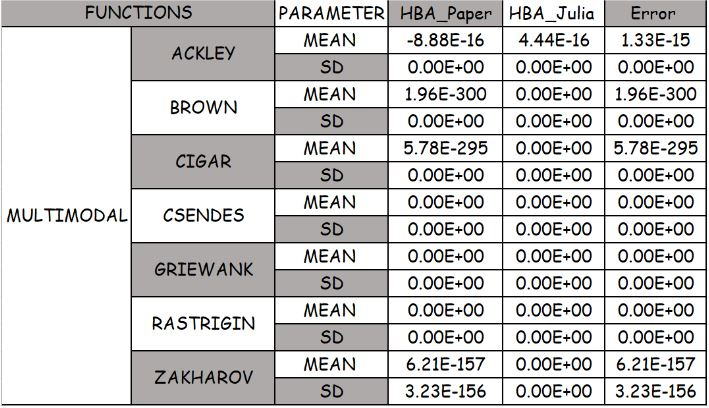

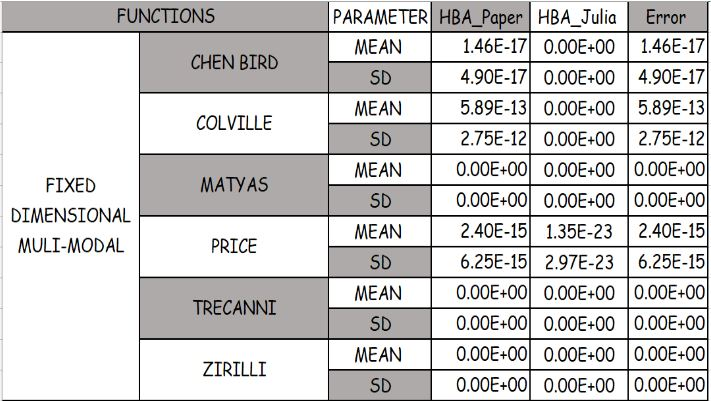

Convergence Analysis

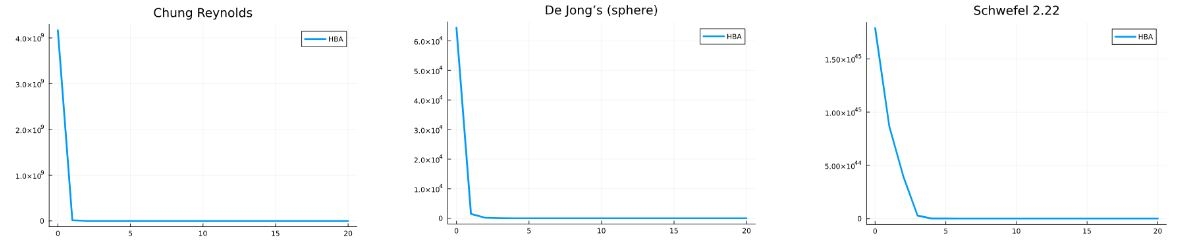

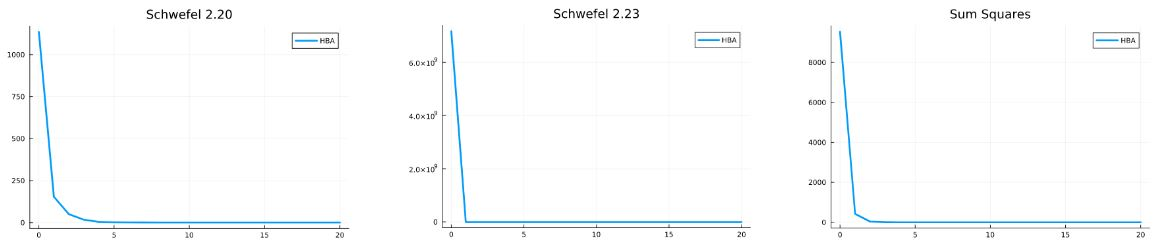

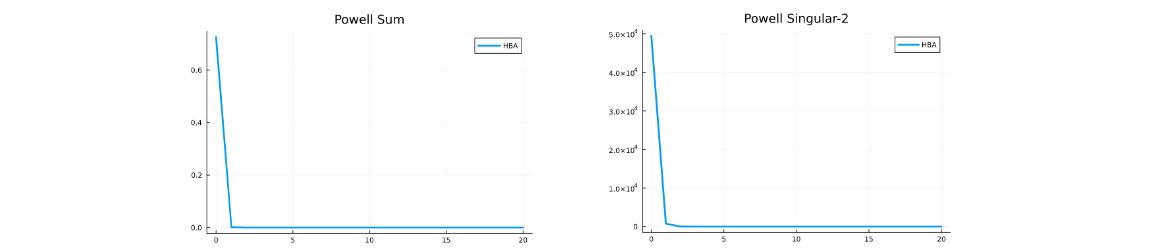

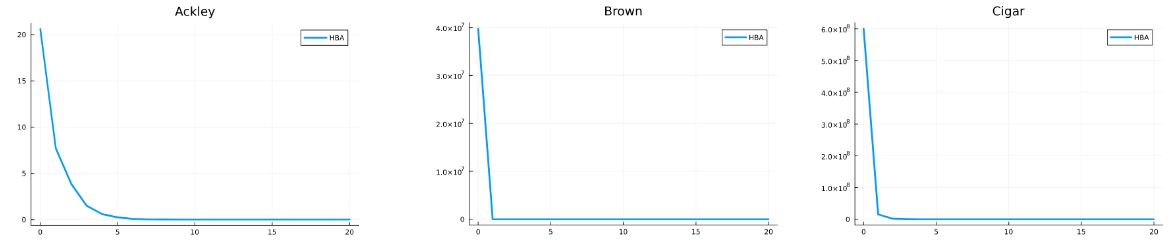

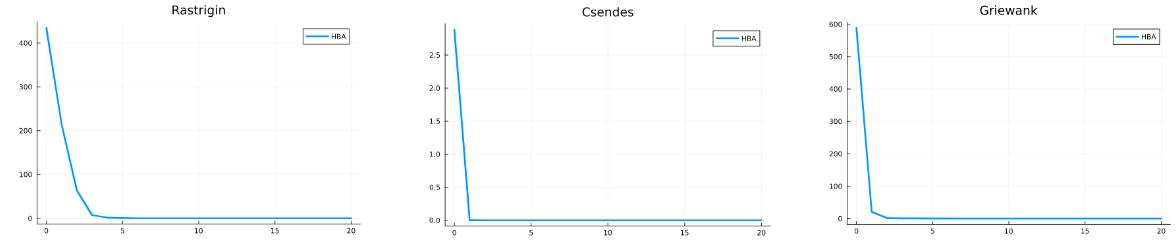

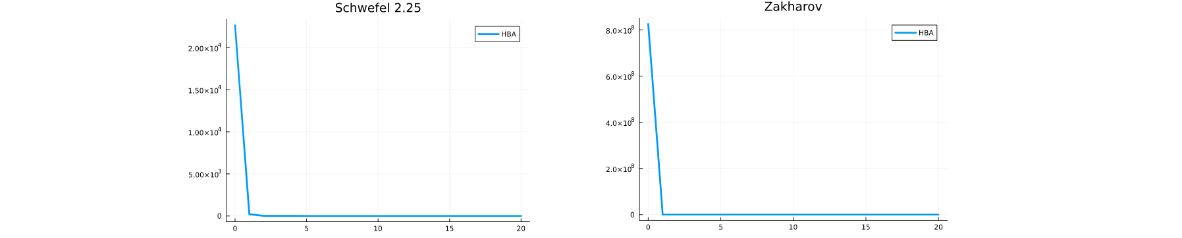

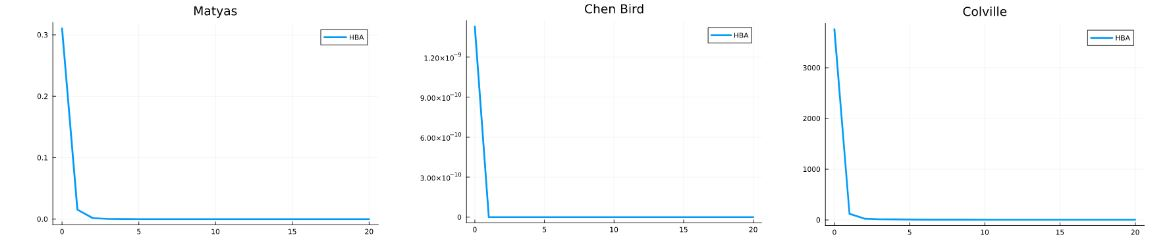

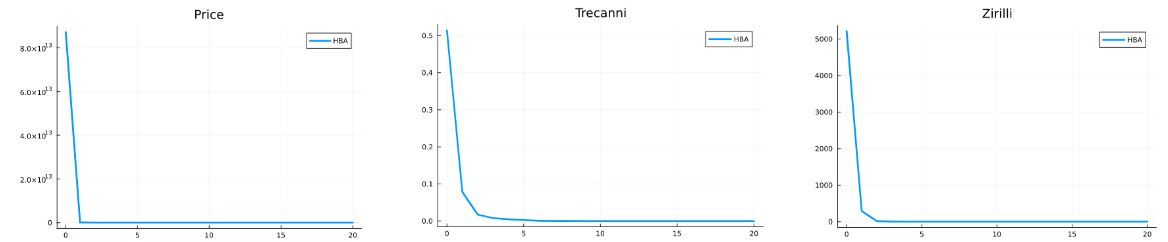

## TSP CODE

Define TSP Problem. Only run one of (1) or (2) from below. These cells ensure distances matrix and n cities are defined for futher code to execute

(1) Random Problem of n cities

In [9]:
# 2d-world
n=7 # cities

# create n cities in a 1x1 square
x = rand(2,n) 

# compute Euclidean distance between cities 
distances=pairwise(Euclidean(), x, dims=2)

7×7 Matrix{Float64}:
 0.0        0.476096  0.547742  0.0975064  0.409784  0.947167  0.579837
 0.476096   0.0       0.88948   0.380765   0.460518  0.941472  0.642517
 0.547742   0.88948   0.0       0.616461   0.482135  0.68769   0.443749
 0.0975064  0.380765  0.616461  0.0        0.392405  0.944638  0.579631
 0.409784   0.460518  0.482135  0.392405   0.0       0.554572  0.198767
 0.947167   0.941472  0.68769   0.944638   0.554572  0.0       0.367388
 0.579837   0.642517  0.443749  0.579631   0.198767  0.367388  0.0

(2) TSPLIB

In [10]:
tsp = readTSPLIB(:burma14)
distances = tsp.weights

# 2d-world
n=tsp.dimension # cities
println("# of cities: ", n)

# optimal value
println("Optimal value: ", tsp.optimal)

# of cities: 14
Optimal value: 3323.0


HELPER FUNCTIONS

In [11]:
# Define a function to calculate the cumulative probabilities
function cum_probabilities(solution, tour, distances)
    # Initialize an array of zeros to store the probabilities
    probs = zeros(length(solution))
    
    # Calculate the probabilities for each city
    for i in 1:length(solution)
        if i ∉ tour
            probs[i] = (solution[i])  * (1/distances[tour[end], i])
        end
    end
    
    probs /= sum(probs)
    
    # Calculate the cumulative probabilities
    cum_probs = cumsum(probs)
    
    return cum_probs
end


# Define a function to select the next city based on the probabilities
function select_city(cum_probs)
    # Generate a random number between 0 and 1
    r = rand()
    
    #println("random value: ", r)
    # Find the index of the first cumulative probability that is greater than r
    index = findfirst(cum_probs .>= r)
    #println("next city: ", index)
    return index
end


#generate tour function

function generateTour(solution)
    
    #println("New Tour..")
    # Initialize the tour as an array of zeros
    tour = zeros(Int, n)

    # Set the first city as the one with the smallest value in the solution
    tour[1] = argmin(solution)
    
    # Generate the rest of the tour using the cumulative probabilities
    for i in 2:n
        # Calculate the cumulative probabilities
        cum_probs = cum_probabilities(solution, tour[1:i-1], distances)
        #println("Cum Probs: ", cum_probs)
        #println("Tour so far...: ", tour)
        # Select the next city based on the probabilities
        next_city = select_city(cum_probs)
    
        # Add the next city to the tour
        tour[i] = next_city
    end

    # Print the tour
    #println("The TSP tour is: ", tour)
    return tour
end


generateTour (generic function with 1 method)

TOUR COST / FITNESS FUNCTION

In [12]:
function tour_cost(o::Array{Int64,1})
    n=length(o)
    result = distances[o[n],o[1]]
    for i in 1:(n-1)
        result += distances[o[i],o[i+1]]
    end
    return result
end

tour_cost (generic function with 1 method)

MODIFIED HONEY BADGER ALGORITHM

In [13]:
# Honey Badger Algorithm

function my_tsp_solver(t_max, N, beta, C, x)
    # t_max = maximum no of iterations
    # N = population size
    # beta = default value as 6
    # C = default value as 2
    # x = initial population
    # obj_func = benchmark function
    # f = fitness of the population
    # x_prey = best position found so far
    # f_prey = best fitness value so far for the x_prey
    # x_new = new position calculated for the ith honey badger
    # f_new = new fitness calculated for the ith honey badger
    # I = intensity of the honey badger
    # F = disturbance direction
    
    #generate tour from initial solution
    
    
    #calucalte the fitness of each honey badger
    tours = generateTour.(x)
    f = tour_cost.(tours)
    #println("fitness vecor: ", f)
    
    #save best posiiton and fitness
    f_prey, x_prey_index = findmin(f)
    x_prey = x[x_prey_index]
    t_prey = tours[x_prey_index]
    
    
    #println("best solution: ", x_prey, " fitness: ", f_prey,  " tour: ", t_prey)
    #println("fitness: ", f_prey)
    fitness_values = []
    push!(fitness_values,(0,f_prey))
    for t in 1:t_max
        
        #println("iteration: ", t)
        
        #calculate the density factor / decreasing factor
        alpha = C * exp(-t / t_max)
        #println("alpha: ", alpha)
        
        #calcualte the intensity of the all honey badgers
        I = intensity(N, x, x_prey)
        #println("Intensity: ", I)
        
        for i in 1:N
            
            #calcuate distance between prey and ith honey badger
            d = x_prey - x[i]
            
            #generate disturbance
            r6 = rand(Uniform(0,1))
            if r6<=0.5
                F = 1
            else
                F = -1
            end
            
            
            #generate a random value to deicde between digging vs honey mode
            r2 = rand(Uniform(0,1))
            
            #TODO : if intensity is infinite then go for honey mode
            if isinf(I[i])
                r2 = 0.9
            end
            
            if r2<0.5
                # digging mode
                #println("Digging mode")
                r3 = rand(Uniform(0,1))
                r4 = rand(Uniform(0,1))
                r5 = rand(Uniform(0,1))
                #println("Intensity: ", I[i])
                #p = abs(cos(2*π*r4) * (1 - cos(2*π*r5)))
                #println("cos value: ", p)
                x_new = x_prey + (F * beta * I[i] * x_prey) + (F * r3 * alpha * d * abs(cos(2*π*r4) * (1 - cos(2*π*r5))))
                #f_new = obj_func(x_new)
                t_new = generateTour(x_new)
                f_new = tour_cost(t_new)
            
            else
                # honey node
                #println("Honey mode")
                r7 = rand(Uniform(0,1))
                x_new = x_prey + (F * r7 * alpha * d)
                #f_new = obj_func(x_new)
                t_new = generateTour(x_new)
                f_new = tour_cost(t_new)
            end
            
            #TODO: mange xnew to be within the bounds
            
            # evaluate the new posiiton and fitness values
            
            #local position update
            if f_new < f[i]
                #println("local position is improved")
                #println("values", x[i], ";", x_new, ";", f[i], ";", f_new  )
                x[i] = x_new
                f[i] = f_new
                
                #println("local position is improved fin")
            end
            
            #prey position update
            if f_new<f_prey
                println("prey position is improved with honey badger # ", i, " in iteration # ", t)
                x_prey = x_new
                f_prey = f_new
                t_prey = t_new
                #println("best solution: ", x_prey, " fitness: ", f_prey,  " tour: ", t_prey)
                push!(fitness_values,(t,f_prey))
            end
            
        end
        #push!(fitness_values,(t,f_prey))
        #println("fitness: ", f_prey)
    end
    return x_prey, f_prey, t_prey, fitness_values 
end
    

my_tsp_solver (generic function with 1 method)

Code to run my_tsp_solver

In [14]:
#dimensions = # of cities
d = n
#lower bound
a = 0
#upper bound
b = 1
# population size
N = 25
#iterations
t_max = 200
#constant beta
beta = 6
#constant C
C = 2

best_value = []
tours = []
for i in 1:5
    x = rand_population_uniform(N, d, a, b )
    x_prey, f_prey, t_prey, fitness_values = my_tsp_solver(t_max, N, beta, C, x)
    push!(best_value, f_prey)
    push!(tours, t_prey)
    println(best_value)
end

println("****Statistical Analysis****")
println("Mean Solution: ", mean(best_value))
println("Standard Deviation: ", std(best_value))
println("Best Solution: ", minimum(best_value))


prey position is improved with honey badger # 6 in iteration # 8
prey position is improved with honey badger # 24 in iteration # 11
prey position is improved with honey badger # 24 in iteration # 14
prey position is improved with honey badger # 12 in iteration # 19
prey position is improved with honey badger # 10 in iteration # 32
Any[3643.0]
prey position is improved with honey badger # 22 in iteration # 14
prey position is improved with honey badger # 10 in iteration # 18
prey position is improved with honey badger # 13 in iteration # 18
prey position is improved with honey badger # 15 in iteration # 20
prey position is improved with honey badger # 9 in iteration # 21
prey position is improved with honey badger # 17 in iteration # 22
Any[3643.0, 3469.0]
prey position is improved with honey badger # 4 in iteration # 4
prey position is improved with honey badger # 15 in iteration # 5
prey position is improved with honey badger # 20 in iteration # 36
prey position is improved with honey

## TSP BENCHMARK RESULTS

No. of runs = 30

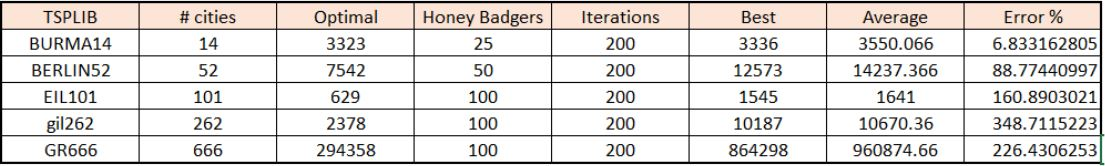

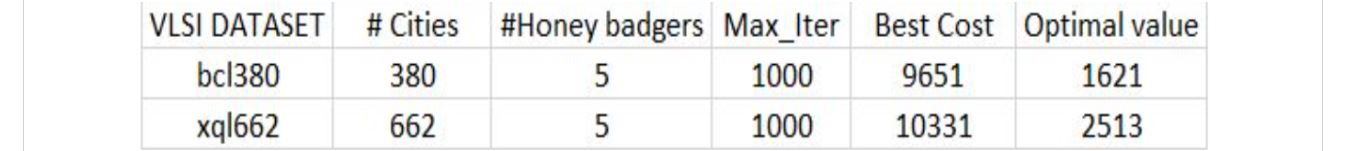

## TSP ART

The creation of TSP art involves several steps, including creating stipples from images using Stipplegen2 which were then exported as SVG files. 
The SVG files were then converted to TSP files using the svg-extract tool, resulting in a TSP file with 1373 cities. This TSP file was used as input into the team's adapted Honey Badger Algorithm, which was run for 10 iterations with 5 honey badgers to solve and plot the TSP art.
We chose the logo designed for the NCSU Construction team - Tuffy Construction. The final TSP art was plotted on a scatter plot and saved as an SVG file. This file was then converted to DFX format and imported into a 3D modeling tool called Blender3D for editing and extrusion. After finalizing the 3D model, it was exported as an STL file and submitted with the report.
The resulting 3D model can be 3D printed, making this project a fascinating example of the intersection between computer science, art, and 3D printing technology. We modified and used the Honey Badger Algorithm to create TSP art, an innovative application of the algorithm, showcasing its versatility and potential in solving complex optimization problems.
We also added some more images we tried with the algorithm.


Validate our Art:

1) Download the attached TSP file named Tuffy

2) Replace the path of the code below 

3) Re run the code cells below "Helper Functions"

4) Art will be plotted below

In [19]:
#enter the path to Tuffy TSP here
path = "C:\\Users\\Barcaboy_Ovid\\ECE 591 Metaheuristic search and Optimization\\Art\\tsp files\\final_1.tsp"
tsp = readTSP(path)

distances = tsp.weights

n=tsp.dimension # cities
println("# of cities: ", n)

# of cities: 1373


In [20]:
x = tsp.nodes
gr()
#println(x)
y = reshape(x,2,n)
#println(y)
#draw_tsp(y, f_prey, n)

2×1373 Matrix{Float64}:
 1657.27  1666.6  1682.54  1684.15  1680.02  …  -528.889  -515.227  -507.809
 1663.51  1673.9  1682.7   1686.27  1675.9      -522.226  -516.829  -505.99

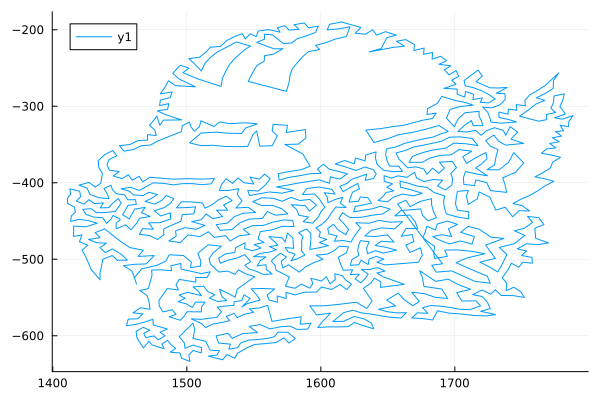

In [21]:
x = tsp.nodes

using Plots

# Define the data
data = x

# Add the first point to the end of the data to connect the last and first points
closed_data = vcat(data, data[1:1, :])

# Create a scatter plot of the points
scatter(data[:, 1], data[:, 2], legend=false)

# Add lines connecting the points in the order they appear in the closed_data
plot(closed_data[:, 1], closed_data[:, 2], seriestype=:path)

## REPORT

### Summary

The project is accomplised in mainly four sections. The first part was to select a template paper of a recent metaheuristic algorithm that solves continuous global optimization problems. The Algorithm chosen is Honey Badger Algorith (HBA) as claims to be superior to other methods in terms of convergence speed and exploration–exploitation balance. Our second step was to implement and benchmark the HBA in Julia programming language. The algorithm was completey implemented with the help of psuedocode provided by the authors of the paper. The algorithm was benchmarked for statistcal analysis and convergence analysis to make sure we had a correct implementation done. The third step is to modify the algorithm to solve the combinatorial TSP problem. A major focus was kept at preserving the original algorithm equations of the HBA and the idea was to massage the TSP problem into the HBA algorithm rather than modifying much of the algorithm for the problem itself. The key idea here was to generate a TSP tour using the distance matrix and the location of the Honey Badger using a probabilistic model. Furthermore, we benchmark the algorithm for the TSPLIB problems and VLSI dataset by looking at the error percentage, best and mean values achieved. The last part of the project is to generate an original art using the TSP algorithm. We proceeded with generating a 3D TSP image art of our university's spirit mascot Tuffy.

### Material & Methods

#### Introduction

In this project, we aimed to solve the Traveling Salesman Problem (TSP) using the Honey Badger Optimization (HBA) algorithm. The HBA is a nature-inspired optimization technique that mimics the foraging behavior of honey badgers to find the optimal solution for a given problem. Our implementation of the HBA algorithm was written in Julia and adapted to the TSP problem.

#### Overall approach

We followed the general approach of the HBA algorithm, which includes initializing a set of honey badgers, allowing them to traverse the serach space, finding and updating the quality of the solutions found using the original equation of the Honey and Digging mode. This the inherent behaviour of the digging mode of the cardiod motion is preserved. The idea now is to generate a TSP tour using the location/ solution given by the Honey Badger. We used a probabilistic approach to choose the next city, based on the value or location of Honey Badger in that dimension and the distance to the last city in the tour so far.

#### Algorithms

We used the HBA to solve the TSP problem. The key idea is to transform the solution generated by a Honey Badger in the continuous domain as a TSP tour. Then calculate it's fitness or the length of the tour. Now, the number of cities in the TSP problem is same as the number of dimensions in the HBA, with the index of representing the city number. So, for example a five city TSP problem will correspond to a solution in five dimensions with the first dimension being city 1 and so on. Next, once a solution is generated, the dimension with the least value is chosen as the starting point of the tour. This has no real signifcance as the tour is a loop. The next city is chosen based on a probabilistic model. Her, we first calculate the probability of choosing all the cities which are not yet in the tour by the formula X_new(i) / distance (lastcity, i) with normalized. Once the cumulative probability is defined for selecting the next city, a random number is generated and the city is chosen. This process goes on until the tour is complete. Eventually, the tour completes and we evaluate the fitness of the tour by calculating the length of the tour.

#### Software

We used Julia programming language (version 1.6.3) to implement our algorithm. We used the TSPLIB.jl and Flux.jl packags to represent and manipulate the TSP benchmark problems, and the Luxor.jl package for the TSP Art. We also used the Statistics.jl package to perform statistical analysis on our results. Other packeges we used include Distributions.jl, Distances.jl, Random.jl and Plots.jl. The system used for running Julia on Jupyter Notebook was Dell Inspiron with Intel i7 processor and Nvidia Geforec GTX 1080.

#### Computational experiments

We conducted a series of computational experiments to evaluate the performance of our algorithm. Firstly, we benchmarked our Julia implementation for 22 functions described in the paper. We carried out the statistical analysis of calculating the mean and standard deviation after 30 Monte Carlo runs with 1000 iterations of the HBA. Then we compared the results against the reported values in the paper. Then we generated the convergence graph after the average values obtained from 30 Monte Carlo runs for every iteration.

Next, we used a benchmark set of 5 TSP instances from the TSPLIB library, ranging in size from 14 to 666 cities. For each instance, we ran our algorithm 30 times and recorded the best solution found, the average solution quality, and the error percentange from the optimal solution.

#### Art

For our art project, we have decided to create a TSP art for the Tuffy construction logo. We will use our modified HBA-TSP algorithm to create an interesting and visually appealing path for the Tuffy construction logo.
Once we have generated the optimized path, we plan to 3D print the logo and hang it on the wall. 3D printing is a great way to bring digital designs to life and will allow us to create a physical representation of our TSP art.


### Results

The Julia implementation of the HBA was benchmarked against the original paper for statistical analysis and convergence graphs. The statistical analysis results can be looked in the tables present in the Benchmark section of this notebook. The results of mean and standard deviation for 22 functions which include unimodal, multimodal and fixed dimensions are included. It can be conculded that our algorithm matched the results for 11 functions and performed slightly better for the remaining 11 functions. This indicates that our implementation of the algorithm is correct. To reproduce the results, one may plugin the desired objective function the code provided in this notebook in the Algorithm section. 


Next, we have drawn the convergence graphs for all the 22 functions and these can be found in the Benchmark section of this notebook. Although the authors have not provided the convergence graphs for all the functions, the ones provided are somewhat similar. To reproduce the results, one may plugin the desired objective function the code provided in this notebook in the Algorithm section.

TSP algorithm has been benchmarked against the TSPLIB library. We ran 30 monte carlo simulations and recorded the mean and best solutions we got after these many runs on five different TSP problems. The problem size/cities varied from 14 to 666. We also calculated the error percentage as the average solution algorithm produced over the 30 runs from the optimal solution. The algorithm was quite far off from the optimal solutions in all the problems except Burma14. The TSP algorithm was also tested on the VLSI dataset from the University of Waterloo. These problems were of size 383 and 682. To reproduce the results, one may plugin the desired problem in the code provided in this notebook in the TSP section. Please note, it is important to have the distance matrix and the n cities defined before running the algorithm.

(left to right) --> Tuffy logo, Stippled image from logo, TSPArt by the HBA.

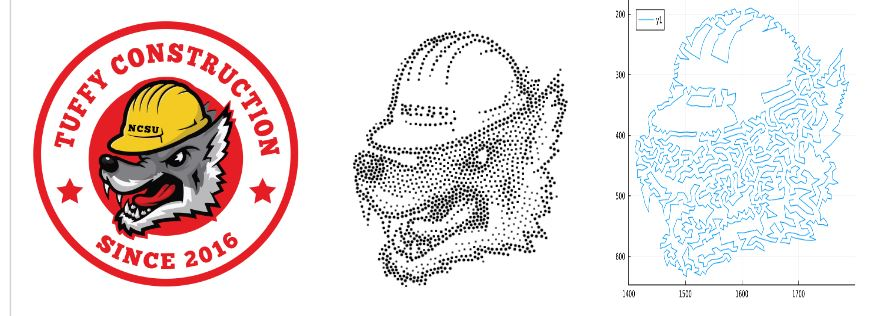

Some more arts:

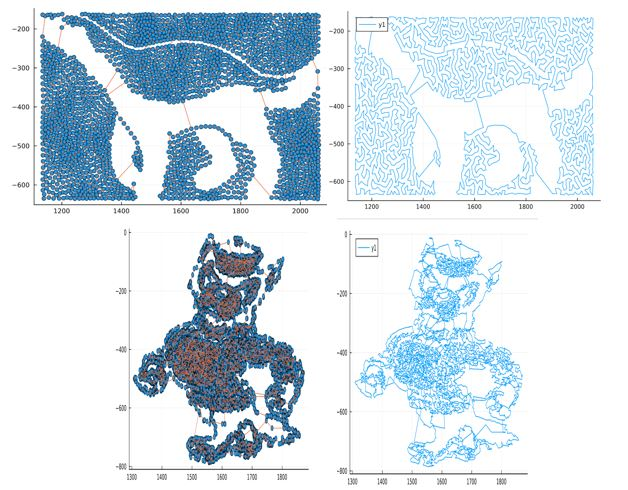

(Left to right) --> CAD to finalise and convert SVG to Dxf. Blender3D modeling to convert Dfx to STL 

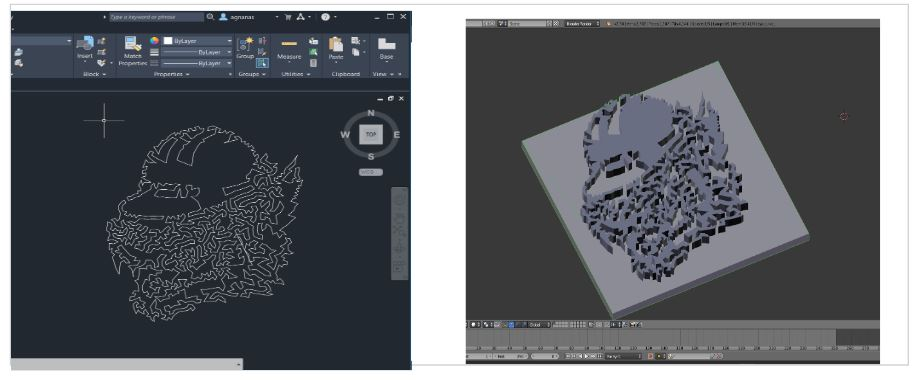

### Discussion

Our first observation is that HBA works extremely well for continuous global optimization problem due to its inherent digging mode that traverses through the serach space in a cartoid motion. Next, we were extremely successful in implementing the algorithm in Julia and reproducing the statistical analysis results from the paper. The statistical results discussed show robustness of the HBA algorithm. The convergence analysis gave us this insight that how efficiently the method progressed during the course of search process. It can be inferred that the algorithm converges to the global optima extremely quickly. 

Our TSP adaptation of the HBA on the other hand did not show much prmoising results. It can be noted that our solutions were generally far off from the optimal tour length. There are two factors we think that might have caused such a result. 

Firstly, the probabilitic model proposed might not really be the best choice to adapt the HBA to solve TSP. 
Secondly, we may need to introduce hyperparametes gamma and omega which decide which part of the solutiona and distnace dominate more for the cumulative probability calcualtion of the next city.  

Eventhough there are some limitations, the algorithm works well to some extend in solving the TSP. The art produced by our algorithm has very minimal intersections. The final result can be 3D Printed as a phsyical 3D TSP art. 

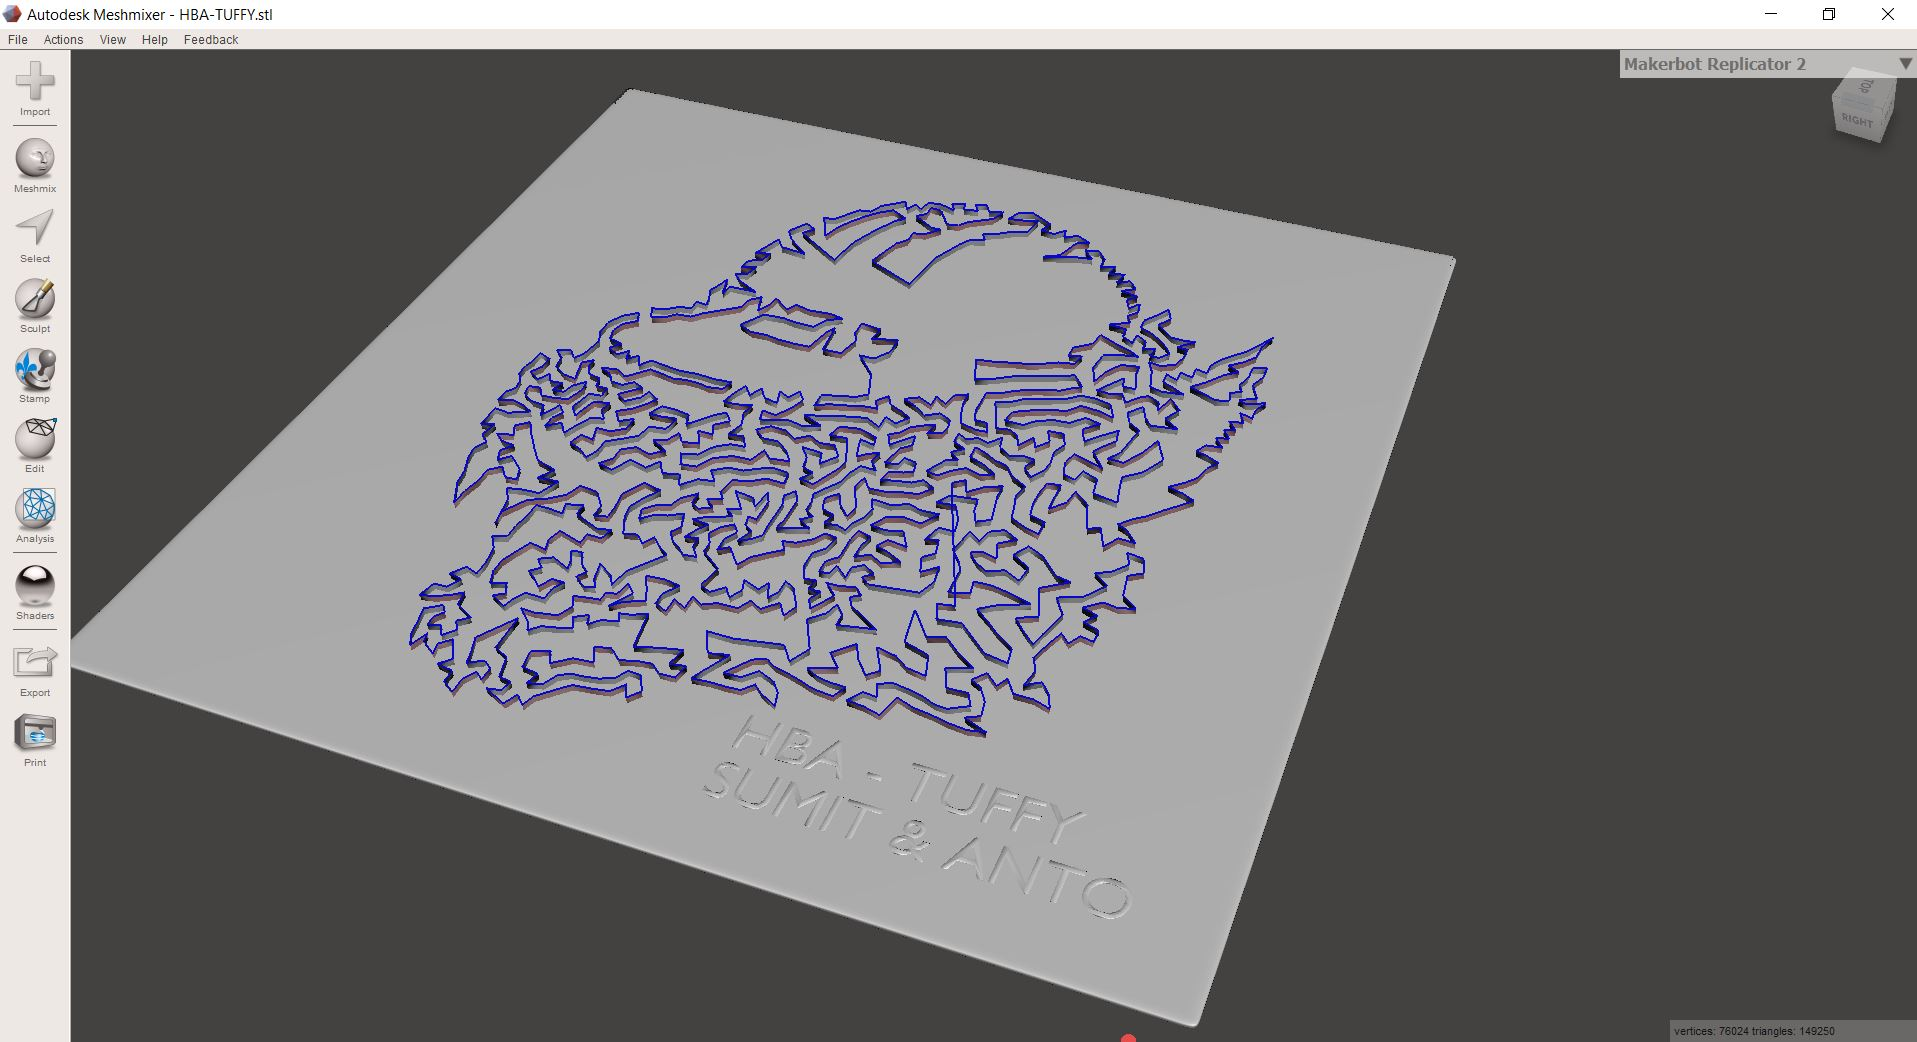


### References

TEMPLATE PAPER: Honey Badge rAlgorithm:New metaheuristic algorithm for solving optimizaton problems (https://sigmaland.ir/wp-content/uploads/2022/01/Sigmaland-Honey-Badger-Algorithm-New-metaheuristic-algorithm-for-solving-optimization-problems.pdf)

TSP Adaptation reference: Safaa Bouzidi and Mohammed Essaid Riffi. 2017. Discrete swallow swarm optimization algorithm for travelling salesman problem. In Proceedings of the 2017 International Conference on Smart Digital Environment (ICSDE '17). Association for Computing Machinery, New York, NY, USA, 80–84. https://doi.org/10.1145/3128128.3128141

svg_extract for TSP - https://github.com/Dr-Noob/svg_extract

Stipple generator 2 - https://www.evilmadscientist.com/2012/stipplegen2/

TSP 3D inspiration - http://www.voidgoat.com/blogs/3d-tsp/

Blender3D_2.78 https://www.blender.org/

AutoCAD for CAD